# [Divide and Conquer, Sorting and Searching, and Randomized Algorithms - Week4](https://www.coursera.org/learn/algorithms-divide-conquer/home/week/4)

## 其他版本
- [以 nbviewer 檢視](https://nbviewer.jupyter.org/github/johnnyasd12/algorithms-stanford/blob/master/Lec%201%20-%20Divide%20and%20Conquer%2C%20Sorting%20and%20Searching%2C%20and%20Randomized%20Algorithms/w4.ipynb)


## VIII. Linear-Time Selection

### [Randomized Selection - Algorithm](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/aqUNa/randomized-selection-algorithm)

#### About Optional Video
- 第一個 optional video 在講怎麼在 deterministic linear time 做到 median selection 這類的事
- 第二個 optional video 在講為何 comparison-based sort 總無法贏過 merge sort

#### The Problem
- input: 給定一個 array $A$，size $n$ 和一個數字 $i$
- output: 求 $i$-th order statistic (即第 $i$ 小的數字)
- 為求簡潔，我們一樣假設 array 的每個數字都不一樣


#### Reduction to Sorting
- **Reduction**
    - 把一個問題轉化成另一個我「已經會解」的問題
    - 我們當然可以先 sort (例如 merge sort) 再直接挑第 $i$ 個，這樣時間複雜度是 $O(n\log n)$
    - 但是這樣就不可能超越 $O(n\log n)$
- 我們想證明 "Selection" 這個問題比 "Sorting" 簡單
- 接下來要對 Quick Sort 做點修改，來達成 Selection 的目的


#### Partitioning Around a Pivot
- 可以回顧 week 3 的內容，回想一下 parition subroutine of quick sort
    - 選定 pivot 然後劃分 array
    - 重新排列 array 使得：
        - 小於 pivot 放它左邊
        - 大於 pivot 放它右邊

#### Quiz: How to Recursively Call Partition to Solve Selection?
Suppose we are looking for the 5th order statistic in an input array of length 10. We partition the array, and the pivot winds up in the third position of the partitioned array. On which side of the pivot do we recurse, and what order statistic should we look for?
- [ ] The 3rd order statistic on the left side of the pivot.
- [x] The 2nd order statistic on the right side of the pivot.
- [ ] The 5th order statistic on the right side of the pivot.
- [ ] "Not enough information to answer question" – we might need to recurse on the left or the right side of the pivot.

#### Randomized Selection
<a id='RSelect'></a>
- 根據前面的 quiz 得到的 insight，我們可以寫出這樣的 algorithm
![](https://i.imgur.com/oj7IVEX.png)
- 圖像思考一下就知道怎麼寫囉


#### Properties of RSelect
- Claim: RSelect is correct. 
- Proof: Induction (參考 QuickSort)
- Running Time? depends on quality of (randomly) chosen pivots (類似 QuickSort)

#### Quiz: Worst Case Running Time of RSelect

![](https://i.imgur.com/mAO47ZL.png)

#### Running Time of RSelect?
- Running Time 會根據 chosen pivot (sequence) 而不同 (最糟糕需要 $\theta(n^2)$)
- 最好可以每次都選到 median ($n/2$) 的 pivot，但這是雞生蛋蛋生雞的問題...
    - 這樣就可以有 $T(n)\le T(n/2)+O(n)$
    - 根據 Master Method，$a=1,b=2,d=1$，$a<b^d$，工作量集中在 root，也就是 $T(n)=O(n^d)=O(n)$
- Hope: **random pivot is "pretty good" and "often enough"**
    - (跟 quick sort 很類似：random 某種程度可以取代 median)
    - 下個 video 就要來證明啦

#### Running Time of RSelect
RSelect Theorem: for every input array of length $n$, the **average** running time of RSelect is $O(n)$
- holds for every input (no assumptions on data)
- "average" is random pivot choices made by the **algorithm** (not data).

### [Randomized Selection - Analysis](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/obhKq/randomized-selection-analysis)

#### Tracking Progress via Phases

![](https://i.imgur.com/kc1xQD5.png)
- 跟 quick sort 一樣，workhorse(主力)放在 partition subroutine
- 因此(不把 recursive call 算進去的話) 計算量 $\le cn$
- 我們用當前 array size 來決定我們現在在哪個階段。
    - 如果當前 array size 落在 $(\frac 3 4)^{j+1}\cdot n$ 和 $(\frac 3 4)^j \cdot n$ 之間，我們就視為他在第 $j$ 個階段
    - 例如第 0 階段就是 array size 介於 $\frac 3 4 n$ 到 $n$ 之間
    - 如果挑到好的 pivot 就可以跳出這個階段到下一階段。
- 接下來我們設計 random variable $X_j$ 代表第 $j$ 個階段我們用了多少個 recursive call。
- 利用上面這些，我們可以知道 Randomized Selection 的 running time $\le \sum_\limits{\textrm{all phases }j}X_j\cdot c\cdot (\frac 3 4)^j \cdot n$，於是我們就得到了 **running time 的 upper bound**。
    - 是 upper bound 是因為第 $j$ 階段的 array size $\le (\frac 3 4)^j n$
- 而等式左邊 (running time) 是一個 random variable；右邊也是一個 random variable。而我們在乎的是它的期望值。

#### Proof II: Reduction to Coin Flipping
- 先來算看看 $X_j$ 的 expectation 好了

![](https://i.imgur.com/pWUCfnp.png)
- 只要選出的 pivot 在 25%~75% 之間，就可以保證從第 $j$ 階段跳到第 $j+1$ 階段
    - (因為這樣的話切出來的任何 sub-array 都會小於當前 size 的 3/4倍)
- 而選出這樣的 pivot 的機率有 50%
- **現在 $X_j$ 可以看成是「擲多少次硬幣可以擲出 good pivot?」，我們想計算 $E[X_j]$。**
    - > Q: 總覺得這比喻不太恰當@@，前一次的 pivot 也會決定這次 pivot 可以跳出第 $j$ phase 的機率吧? 感覺就算都在第 $j$ 階段，每次擲硬幣擲到 good pivot 的機率應該不會一樣? **跳出階段 $j$ 需要的次數實際上應該會比「擲硬幣的次數」少?**

#### Proof III: Coin Flipping Analysis

![](https://i.imgur.com/arEnM74.png)
- 其實就是要求 geometric random variable 的 expectation
- 令 random variable $N$ 表示「要擲多少次硬幣才能擲出人頭」
    - 假設擲一次出人頭的機率 $p=1/2$
- 因為這個次數 $N$ 絕對至少需要一次，所以我們可以表示成 $E[N]=1+...$
- 而 $E[N]=1+...$ 第一次擲失敗才會擲第二次第三次嘛，所以「還需要擲更多次硬幣」的機率為 $1-p=1/2$
- 這是一個 memoryless process(失憶性過程?)，也就是說「還需要擲幾次」跟「已經擲了幾次」沒關係，因此「還需要擲的次數」期望值仍然是 $E[N]$
- 所以可以寫成 $E[N]=1+(1-p)E[N]$，移項得 $E[N]=\frac 1 p$
- $p=1/2$，也就是說此時 $E[N]=2$
- 回想 $X_j$ 其實跟這裡的 $N$ 扮演類似角色。


#### Putting It All Together

![](https://i.imgur.com/FyHFC32.png)
- > Q: 第 3 行的「$\le$」似乎就呼應了我在 *Proof II: Reduction to Coin Flipping* 部分提出的問題?
- 第 4 行：$\sum_j (\frac 3 4)^j\le 4$ 可以回想 $\sum_{k=1}^K r^k=\dfrac{1}{1-r^k}<\dfrac 1 {1-r}$。($r<1$)
- 最終得證我們的 upper bound $\le 8cn$，因此 running time $=O(n)$。

### [Deterministic Selection - Algorithm [Advanced - Optional]](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/vtehr/deterministic-selection-algorithm-advanced-optional)

- > Q: 一開始的意思是說，這個 deterministic algorithm 複雜度可以在 $O(n)$，但是 practically 比 Randomized Selection 慢，因為 constant 比較大，而且它的 operation 沒辦法 in-place?
- > Q: 但是 worst case 比 Randomized Selection 好嗎?

#### The Problem
- 要解的問題一樣是找第 $i$ 小的 element。

#### The Randomized Selection

![](https://i.imgur.com/jhKPyzK.png)
<!-- - 接下來要講的方法可以看成是修改過的 [Randomized Selection](#Randomized-Selection)，因此可以先複習一下。 -->
- 接下來要講的方法可以看成是修改過的 [Randomized Selection](#RSelect)，因此可以先複習一下。

#### Guaranteeing a Good Pivot
- 回想：最好的 pivot 就是 median
- 目標：找到一個足夠好的 pivot (大概跟 median 差不多就好了)
- Key Idea: using **"median of medians"**!!


#### A Deterministic ChoosePivot

![](https://i.imgur.com/pgXCQLD.png)
- 把 $A$ 切成 $\frac n 5$ 個 groups (每組 $5$ 個 elements)
- 每個 group 都做 sorting (例如 merge sort)
- 把所有 $\frac n 5$ 個 group 的 medians 都存到 new array $C$
- recursively compute median of $C$
- 最後算出來的 median 把它當 pivot

#### The DSelect Algorithm

![](https://i.imgur.com/X3GhLgz.png)
- 前面就是改造過的 ChoosePivot
- 後面就是之前的 RSelect，只是 pivot 用前面得到的
- 從這裡可以看出我們會在這個 algorithm 中，(不計 base case) 每次 call 都做 2 次 recursive call。
    - 相較於 Randomized Selection (只需要一次 recursive call)，我們在第 3 行多做了一次 recursive call

#### Running Time of DSelect
- 雖然 DSelect (Deterministic Selection) 不會落到 $O(n^2)$，總是 $O(n)$，但實務上會比 RSelect (Randomized Selection) 差。因為
    - worse constant
    - not in-place


### [Deterministic Selection - Analysis I [Advanced - Optional]](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/2wmHr/deterministic-selection-analysis-i-advanced-optional)



![](https://i.imgur.com/X3GhLgz.png)
- 回顧一下 DSelect
- > Q: 不知道 $5$ 這個數字換成別的是不是也可以 linear ? 改天導導看

#### Quiz: Asymptotic Running Time of Sorting All Sub-Arrays?

![](https://i.imgur.com/Qr27bMN.png)
- sort 長度為 5 的 array 需要的 time 為 constant
- 共有 $\frac n 5$ 個這樣的 array 因此 $\textrm{constant}\cdot \frac n 5 = \theta(n)$

#### The DSelect Algorithm (Decomposed Complexities)

![](https://i.imgur.com/9lf2e3C.png)
- 之前 (QuickSort, RSelect) 不用 recurrence 的方式去分析是因為 randomized algorithm 沒辦法知道第 6、7 行的 recursive call 的 input 大小，它是被 pivot $p$ 決定的。
- > Q: 現在就可以知道嗎@@?


#### Rough Recurrence

![](https://i.imgur.com/97e6S0g.png)
- 長度為 1 就直接 return 就好因此 $T(1)=1$
- $T(n)=c\cdot n + T(\frac n 5) + T(?)$
    - 問號很難處理呀，我們要把它換成別的東西。

#### The Key Lemma

![](https://i.imgur.com/1CfAMRh.png)
- 實際上應該是 $\frac{7}{10}n - 5$，不過不影響大觀念。
- 方便起見，接下來我們用：
    - $k$ 代表 "# of groups"，以我們的 case 而言 $k=\frac n 5$
    - $x_i$ 代表挑出來的 medians 裡面第 $i$ 小的，因此我們要找的 pivot 就是 $x_{k/2}$
- 那麼我們要來證明：「以 median of medians 的方式選出來的 pivot」，會在所有 elements 大小的 30% ~ 70% 之間。

#### Rough Proof of Key Lemma

![](https://i.imgur.com/nHDUG6V.png)
- 剛剛不是把原本的 array $A$ 分成 $k$ 組 sub-arrays 嗎，把這 $k$ 組畫出來
- 一個 column 就是一組 sub-array，排序下小上大
- 照 medians $x_i$ 的大小順序排列，左小右大
- 可以看出左下黃色部分一定小於等於 $x_{k/2}$；右上黃色部分一定大於等於 $x_{k/2}$
    - 左下黃色部分占了左「半」邊的 3/5；因此至少有 $\frac 3 5\times \frac 1 2=30\%$ 的 elements 比 $x_{k/2}$ 小
    - 同理，至少有 30% 的 elements 比 $x_{k/2}$ 還要大。
- 得證啦，選出的 pivot 會介在 30% ~ 70% 之間。

#### Example (of Key Lemma)

![](https://i.imgur.com/0xj8lE7.png)
- 有點懶得看 example 啊

### [Deterministic Selection - Analysis II [Advanced - Optional]](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/vOjvG/deterministic-selection-analysis-ii-advanced-optional)

#### Rough Recurrence (Revisited)

![](https://i.imgur.com/97e6S0g.png)
- 現在我們可以確定問號裡面的東西 $\le \frac {7}{10} n$ 啦


#### Rough Recurrence (Revisited)

![](https://i.imgur.com/xdFxxLI.png)
- 不能直接套 Master Method 因為 subproblem 的 size 不一樣
- 這邊要用比較奇妙(?)的證明，先假設某件事是對的，然後用歸納法 (induction) 證明它。
- 那我們就假設存在 constant $a$ 使得 DSelect 的 running time $T(n)\le a n,\forall n\ge 1$ 

#### Analysis of Rough Recurrence

![](https://i.imgur.com/Z57fcn2.png)
- 怎麼知道 $a$ 要代 $10c$ 呢? 其實就先把 $a$ 帶進去推導之後看代多少可以達成條件就好了。reverse engineering!!
- 歸納法的假設就是對於所有 $k<n$ 都成立，只要可以用這個假設推導出 $n$ 的 case 也成立，即可得證所有數字都成立。
- 推完之後就可以知道，只要代 $a=10c$，就可以證明出來。
    - > Q: 可以這樣證明的原因應該也是因為我們目的只是要證明「存在 $a$」使得不等式成立即可吧。
- 終於得證 $T(n)=O(n)$ 啦！ DSelect is in linear time !!!

### [Omega(n log n) Lower Bound for Comparison-Based Sorting [Advanced - Optional]](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/P2uwC/omega-n-log-n-lower-bound-for-comparison-based-sorting-advanced-optional)

#### A Sorting Lower Bound

![](https://i.imgur.com/Y6TjhJm.png)
- 我們可以做得比 $n\log n$ 好嗎?
- 只要是 comparison based sort 就沒辦法比 $n\log n$ 好。
    - 即使是 average case 也一樣無法超越 $n\log n$。
        - > Q: 是指 randomized algorithm 的 average case (randomness is from algorithm) 還是 deterministic algorithm 的 average case (randomness is from data)? 還是都是XD
- comprison based sort examples: 
    - Merge Sort：algorithm 唯一的 interaction with elements 是 compare & copy
        - 回想 merge subroutine，就是把兩個 sorted array 從頭開始一一比較，然後把最小的 copy 到新的 array 的最左邊空位
    - Quick Sort (only compare & in-place swapping)
        - 回想 partition (subroutine?) 就是把 elements 都跟 pivot 比較，然後 in-place 換位置。
    - Heap Sort (之後會講)
- 非 comparison based sort 有：
    - Bucket Sort (似乎適用於 uniformly distributed 於已知範圍??)
    - Counting Sort (已知數值範圍且是 integer?) 不須比較 elements 大小
    - Radix Sort
    - 有聽沒懂，總之都對 data distribution 有一些 assumption，就可以比 $n\log n$ 更低



- > Q: 這一段有點難懂@@

#### Proof Idea

![](https://i.imgur.com/2XlIXXe.png)
- 方便起見我們假設長度為 $n$ 的 array 內容為 [1,2,3,...,n]
- 假設 algorithm 的 comparison 次數 $\le k$
- 長度為 $n$ 的 array 共有 $n!$ 種組合
    - 註：$n!$ 的英文是 n factorial
- 唯一會在執行中造成 branch 的就是 **resolution of comparison**
    - > Q: resolution of comparison 是啥@@ 看無
    - > branch 後來覺得應該是指 execution branch
- 因此 execution 最多就只有 $2^k$ 條路可以走
- 可以聯想成 $k$-bit 的 string??? 
    - > Q: 什麼東西啊啊啊
- 也就是 $2^k$ 種不同的 comparison results。
    - > 我好像懂了什麼？每次 comparison 都可能有兩種不同答案(大於或小於)，不同的答案就導致不同的 execution，因此共有 $2^k$ 種 comparison result (sequences) 也就會有 $2^k$ 種 execution。
- 整合來看，我們的 algorithm 最多作 $k$ 次 comparison，最多會有 $2^k$ 種 comparison result，而 array 的 order 種類可能有 $n!$ 種。
- 因此 $2^k$ 必須大於 $n!$ 是嗎? 下個 slide 講得比較詳細。

#### Proof Idea (Con'd)

![](https://i.imgur.com/uSAxcCx.png)
- 如果 $2^k <n!$，根據鴿籠原理，就會有某個 comparison result 包含了超過一種 order 的 array，但是這樣一定有某個 order 的 array 是被 compare 錯的。因此 $2^k \ge n!$
- $n! \ge (\frac n 2)^{\frac n 2}$ 因為 $n!\ge n\times (n-1)\times \cdots \times (\frac n 2)\ge (\frac n 2)^{\frac n 2}$
- 因此 $2^k \ge (\frac n 2)^{\frac n 2}$ 取 log，$k\ge \frac n 2\log \frac n 2=\Omega(n\log n)$，Q.E.D.
- 證明完啦！**任何 comparison based sort 都需要 $\Omega(n\log n)$ running time！**
    - > Q: 但是 $k$ 不是 comparison upper bound 嗎? 我們證出來的好像是 upper bound 的 lower bound，這樣算 lower bound 嗎?

## IX. Graphs and the Contraction Algorithm

### [Graphs and Minimum Cuts](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/Md9GY/graphs-and-minimum-cuts) (Overview)

#### Graphs

![](https://i.imgur.com/vK8l0aK.png)
- graph 就是用來表示 **pairwise relationships among a set of objects**
- undirected edge 連接出的是 unordered pair
- directed edge 連接的是 ordered pair (即 **arcs**)
    - 通常會用 tail, head 來稱呼 directed edge 的兩端
        - **tail = 箭頭後面 = first vertex**
        - **head = 箭頭前面 = second vertex**
- verti**ces** / node**s** $V$
- edge**s** $E$

#### Cuts of Graphs

![](https://i.imgur.com/e3iMiYz.png)
- **cut 就是指把一個 graph 分成 $A$、$B$ 兩個 non-empty set**
- 當我們把一個 graph 分成 $A$、$B$ 兩個 set，那麼 edge 便可以分成三種
    - 兩個 endpoints 都在 $A$ 裡面
    - 兩個 endpoints 都在 $B$ 裡面
    - 兩個 endpoints 分別在 $A$、$B$ 裡面
- **crossing edges** of cut $(A,B)$ 的定義
    - [undirected] 連接 $A,B$ 的 edge
    - [directed] 從 $A$ 通往 $B$ 的 edge (本門課不討論從 $B$ 通往 $A$ 的方向)
        - > Q: 意思是 crossing edges 是這門課定義的嗎@@?

#### Quiz: How Many Cuts?

Roughly how many cuts does a graph with $n$ vertices have?
- [ ] $n$
- [ ] $n^2$
- [x] $2^n$
- [ ] $n^n$
- 嚴格來說應該是 $2^n-2$ 啦，因為不能有 empty set。

#### The Minimum Cut Problem

![](https://i.imgur.com/y52dx4V.png)

#### Quiz: How Many Crossing Edges?

![](https://i.imgur.com/XyA77nb.png)

#### A Few Applications

![](https://i.imgur.com/LIcLhZT.png)
- minimum cut 是一種 graph partitioning 問題
- Applications
    - 有效地打斷某個地方的運輸系統
    - 在社群網站中分辨出緊密連結的群體/人際網路
    - image segmentation
        - 相鄰的 pixel 就算是有 edge 連接
        - 通常會用 weighted edge，weight 代表了兩個 pixel 有多大可能來自同個 object。
        - 希望跑了 min cut 之後可以切出主要 object。

### [Graph Representations](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/b3CWT/graph-representations)

#### Graphs

![](https://i.imgur.com/vK8l0aK.png)
- 一般慣用的 notation
    - **通常用 $n$ 表示 # of vertices**
    - **通常用 $m$ 表示 # of edges**

#### Quiz: Number of Edges in a Connected Graph

![](https://i.imgur.com/19zDhRe.png)
- minimum $n-1$ 可有各種畫法，總之當下 connected 就把它變成同個 piece，再從裡面隨便挑一個 vertex 連到下一個 vertex 即可。

#### Sparse vs. Dense Graphs

![](https://i.imgur.com/5ruI5eK.png)
- 這並不是很正式的定義，不過一般並不對 sparse / dense 作非常嚴謹的定義。

#### The Adjacency Matrix

![](https://i.imgur.com/teLCzYX.png)
- 較適合 dense graph，如果用在 sparse graph 上很浪費空間。


#### Adjacency Lists

![](https://i.imgur.com/SIhRh6S.png)
- 為了作 cross reference 所以有「以 vertex 為主」和「以 edge 為主」的 storage。
- > Q: [這個](https://hackmd.io/@johnnyasd12/BywdW4-iI) 寫的似乎稍有不同?

#### Quiz: Space of Adjacency List

![](https://i.imgur.com/etdKCYI.png)

#### Adjacency Lists (Properties)

![](https://i.imgur.com/617VCch.png)
- 注意 space 的 complexity。
- > Q: 後面一大段都不太明白意思@@

### [Random Contraction Algorithm](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/FKAnq/random-contraction-algorithm)

#### Random Contraction Algorithm

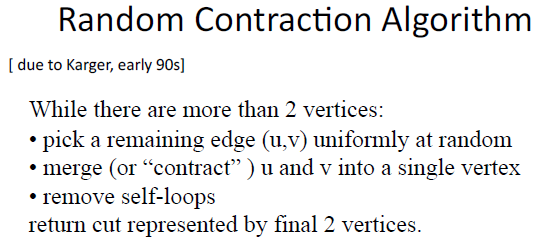
<!-- ![](https://i.imgur.com/9DYfqjx.png) -->
- 隨機挑一個 edge 合併兩端 vertices 成一個 vertex


#### Example

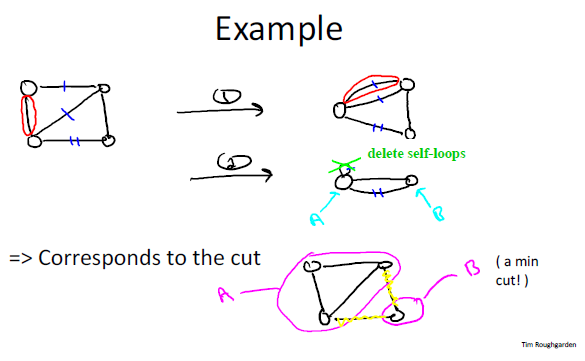
<!-- ![](https://i.imgur.com/MzCWHhG.png) -->
- 因為是 randomized algorithm 所以執行可能會有各種結果，我們先來看看這種。
- 結果成功地找到 min cut。



#### Example (Con'd)

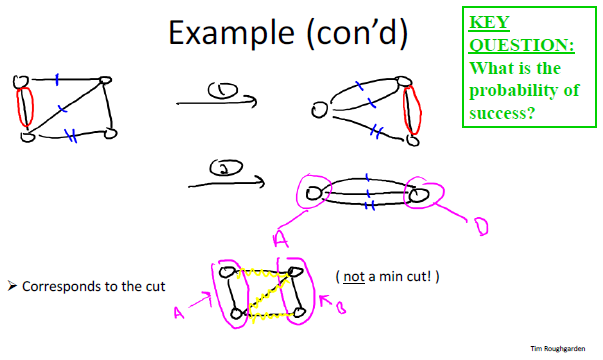
<!-- ![](https://i.imgur.com/pHTqMRC.png) -->
- 這是另外一種可能的執行結果。
- 而這種失敗了。
- 接下來我們要來算算 Random Contraction Algorithm 有多大機率會成功。



### [Analysis of Contraction Algorithm](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/4TLKM/analysis-of-contraction-algorithm)

### [Counting Minimum Cuts](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/96RUg/counting-minimum-cuts)